# 3 - 1 검색 알고리즘
## 검색과 키
- 검색 알고리즘 : 데이터 집합에서 원하는 값을 가진 원소를 찾아내는 알고리즘
- 키 : 집중하는 항목 ! (조건이 있는) {ex) 국적이 한국인 사람 => 키 : 국적 }

## 검색의 종류 - 배열검색, 연결 리스트 검색, 이진 검색 트리 검색
 3장에서는 배열검색만 다룬다.
 ### 배열 검색
 #### - 선형 검색
 #### - 이진 검색
 #### - 해시법             

# 3 - 2 선형 검색

 - 선형 검색 : 배열 검색 중 가장 기본적인 알고리즘
             : 직선(선형)으로 늘어진 배열에서 원소를 찾을때 까지 맨 앞부터 차례대로 스캔한다.

In [ ]:
# 선형 검색
i = 0
while True:
    if i == len(a):
        # 검색 실패
    if a[i] == key:
        # 검색 성공 (인덱스 =i)
    i += 1

In [2]:
# while 문으로 작성한 선형 알고리즘

from typing import Any, Sequence

def seq_search(a:Sequence, key :  Any) -> int:
    """시퀀스 a에서 key와 값이 같은 원소를 선형 검색(while문)"""
    i = 0
    
    while True:
        if i == len(a):
            return -1
        if a[i] ==key:
            return i
        i+=1

if __name__ =='__main__':
    num = int(input('원소 수를 입력하세요. : '))  # num값을 입력받음
    x = [None] * num
    
    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))
        
    ky = int(input('검색할 값을 입력하세요. : '))
    
    idx = seq_search(x,ky)
    
    if idx == -1:
        print('존재 x')
    else:
        print(f'검색값은 x[{idx}]에 있습니다.')

원소 수를 입력하세요. : 7
x[0]: 6
x[1]: 4
x[2]: 3
x[3]: 2
x[4]: 1
x[5]: 2
x[6]: 8
검색할 값을 입력하세요. : 8
검색값은 x[6]에 있습니다.


In [ ]:
# while이 아닌 for문으로 해보자

from typing import Any,Sequence

def seq_search(a: Sequence, key: Any) -> int:
    """시퀀스 a에서 key와 값이 같은원소를 선형 검색(for문)"""
    for i in range(len(a)):
        if a[i] == key:
            return i # 검색 성공(인덱스를 반환)
    return -1       # 검색 실패 (-1을 반환)


In [4]:
# 보충 3-1, 실습 3C-1

# seq_search() 함수를 사용하여 실수 검색하기
def seq_search(a:Sequence, key :  Any) -> int:
    """시퀀스 a에서 key와 값이 같은 원소를 선형 검색(while문)"""
    i = 0
    
    while True:
        if i == len(a):
            return -1
        if a[i] ==key:
            return i
        i+=1

print('실수를  검색합니다.')
print('"End"를 입력하면 종료합니다.')

number = 0
x = []      

while True:
    s = input(f'x[{number}]: ')
    if s == 'End':
        break
    x.append(float(s))           # 배열 맨 끝에 원소를 추가
    number += 1

ky = float(input('검색할 값을 입력하세요. : ')) # 검색할 키 ky를 입력받기

idx = seq_search(x, ky)
if idx == -1:
    print('검색값을 갖는 원소가 존재하지 않습니다.')
else:
    print(f'검색값은 x[{idx}]에 있습니다.')

실수를  검색합니다.
"End"를 입력하면 종료합니다.
x[0]: 12.7
x[1]: 3.14
x[2]: 6.2
x[3]: 7.2
x[4]: End
검색할 값을 입력하세요. : 7.2
검색값은 x[3]에 있습니다.


In [12]:
# 실습 3C -2


def seq_search(a:Sequence, key :  Any) -> int:
    """시퀀스 a에서 key와 값이 같은 원소를 선형 검색(while문)"""
    i = 0
    
    while True:
        if i == len(a):  # 길이가 0 이거나   +   다 돌았을 경우 len(5)일경우 인덱스 넘버 4이므로 끝남
            return -1
        if a[i] ==key:
            return i
        i+=1
        
t = (4, 7, 5.6, 2, 3.14, 1)
s = 'string'
a = ['DTS','AAC','FLAC']

print(f'{t}에서 5.6의 인덱스는 {seq_search(t, 5.6)} 입니다. ')
print(f'{s}에서 "n"의 인덱스는 {seq_search(s,"n")} 입니다. ')
print(f'{a}에서 "DTS"의 인덱스는 {seq_search(a,"DTS")} 입니다.')


(4, 7, 5.6, 2, 3.14, 1)에서 5.6의 인덱스는 2 입니다. 
string에서 "n"의 인덱스는 4 입니다. 
['DTS', 'AAC', 'FLAC']에서 "DTS"의 인덱스는 0 입니다.


## 보초법
### 선형 검색은 반복할 때마다 두 가지 종료 조건을 체크한다.
- 1 : 검색할 값을 찾지 못하고 배열의 맨 끝을 지나간 경우
- 2 : 검색할 값과 같은 원소를 찾는 경우

#### 보초법을 사용하면 2번째 조건만 판단하면 되기 때문에 검사 비용을 반으로 줄일 수 있다.

In [14]:
from typing import Any,Sequence
import copy

def seq_search(seq:Sequence, key:Any) -> int:
    """시퀀스에서 키와 일치하는 원소를 선형검색 through 보촙버"""
    a = copy.deepcopy(seq)
    a.append(key) #보초 key를 리스트a의 마지막에 추가
    
    i = 0
    while True:
        if a[i] == key:
            break
        i += 1
    return -1 if i == len(seq) else i

if __name__ == '__main__':
    num = int(input('원소 수를 입력하세요. : '))
    x = [None] * num
    
    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))
        
    ky = int(input('검색할 값을 입력하세요. : ')) #검색할 키 ky입력받기
    
    idx = seq_search(x,ky)
    
    if idx == -1:
        print('존재하지 않습니다. ')
    else:
        print(f'검색할 값은 x[{idx}]에 있습니다.')

원소 수를 입력하세요. : 7
x[0]: 6
x[1]: 4
x[2]: 3
x[3]: 2
x[4]: 1
x[5]: 2
x[6]: 8
검색할 값을 입력하세요. : 8
검색할 값은 x[6]에 있습니다.


# 3 - 3 이진 검색
### 이진 검색 (binary search)
#### 조건 : 정렬이 되어있어야함. 특징: 선형보다 속도가 빠름.

##### 1~100 숫자 맞추기 게임과 같은 알고리즘
- 이진 검색의 종료 조건 (OR)
- a[pc]와 key가 일치하는 경우
- 검색 범위가 더이상 없는 경우

In [1]:
# 실습 3-4
# 이진 검색 알고리즘 

from typing import Any,Sequence

def bin_search(a:Sequence, key:Any) -> int:
    """시퀀스 a에서 key와 일치하는 원소를 이진 검색"""
    pl = 0              
    pr = len(a) - 1
    
    while True:
        pc = (pl+pr) // 2
        if a[pc] == key:
            return pc
        elif a[pc] < key:
            pl = pc + 1
        elif a[pc] > key:
            pr = pc - 1
        if pl > pr:
            break
            return -1 # 검색 실패
    
if __name__ =='__main__':
    num = int(input('원소 수를 입력하세요. : '))
    x = [None] * num
    
    print('배열 데이터를 오름차순으로 입력하세요. : ')
    
    x[0] = int(input(f'x[0]: '))
    
    for i in range(1,num):
        while True:
            x[i] = int(iuput(f'x[{i}]: '))
            if x[i] >= x[i-1]:
                break
    ky = int(input('검색할 값을 입력하세요. : '))
    
    idx = bin_search(x, ky)
    
    if idx == -1:
        print('존재 x')
    else:
        print(f'검색값은 x[{idx}]에 있습니다.')

원소 수를 입력하세요. : 7
배열 데이터를 오름차순으로 입력하세요. : 
x[0]: 1


NameError: name 'iuput' is not defined

#### 복잡도 : 알고리즘의 성능을 객관적으로 평가하는 기준
- 시간 복잡도 : 실행하는 데 필요한 시간을 평가
- 공간 복잡도 : 메모리와 파일 공간이 얼마나 필요한지를 평가

In [ ]:
# 선형 검색의 시간 복잡도
# seq_search()를 바탕으로 시간 복잡도를 알아보기
def seq_search(a:Sequence, key: Any) -> int:
    i = 0
    while i < n:
        if a[i] == key:
            return i # 검색 성공
        i += 1
        return -1    # 검색 실패

- 아래 표는 위의 3행~9행 (인덱스 num 1~6)이 몇 번 실행되는지를 정리한 것.
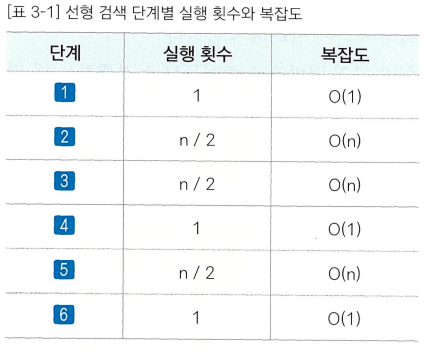

- i에 0을 대입하면 [1]이 1번 실행됩니다. 1번만 실행되면 복잡도를 O(1)로 나타낸다.

- 값을 반환하는 [4,6]또한 O(1)이다.

- 배열의 맨 끝에 도달했는지를 판단하는 [2]와 주목할 원소와 검색할 값이 같은지를 판단하는 [3]의 평균 실행 횟수는  n / 2 입니다.
- 이와 같이 n에 비례하는 횟수만큼 실행되는 경우의 복잡도는 O(n)으로 나타낸다.

- n이 커지면 복잡도도 커진다. 하지만 O(1)에 필요한 계산시간은 불변. -> O(f(n))과 O(g(n))의 동작을 연속으로 하는경우 복잡도는 일반적으로 다음과 같이 나타낼 수 있다.

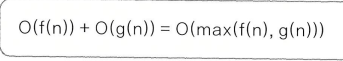

- 2가지 계산으로 구성된 알고리즘의 복잡돈느 더 높은 차원의 복잡도를 우선으로 한다. (3가지도 마찬가지)

- 선형 검색 알고리즘의 복잡도 최종:
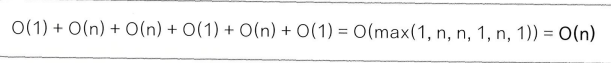

##### index() 함수로 검색하기
- 리스트 / 튜플에서 검색은 각 클래스의 index()로 수행할 수 있다.
##### - obj.index(x,i,j)

#### 이진 검색의 시간 복잡도
- 실습 3-4의 이진 검색하는 시간 복잡도를 알아보자. 
- 이진 검색에서는 주목할 원소의 검색 범위가 거의 절반쯤 줄어듦.

In [ ]:
def bin_search(a: Sequence, key:Any) -> int:
    pl = 0                 #1
    pr = len(a) - 1        #2
    
    while True:
        pc = (pl+pr) // 2  #3, 중앙 원소의 인덱스
        if a[pc] == key:   #4
            return pc      #5
        elif a[pc] < key:  #6
            pl = pc + 1    #7, 검색 범위 뒤쪽 절반으로 좁힘
        else:  
            pr = pc - 1    #8 검색 범위 앞쪽 절반으로 좁힘
        if pl > pr:        #9
            break
    return -1              #10 검색 실패

#### 아래 표 : 행 별로 몇 번 실행되는지를 정리
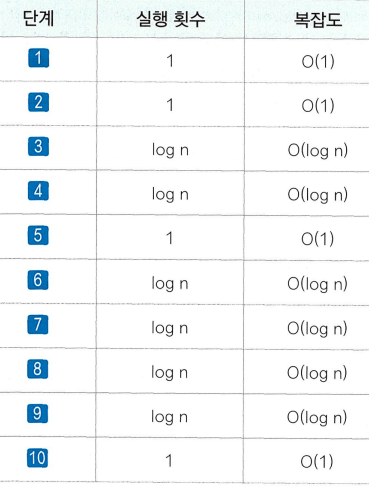

## 이진 검색 알고리즘의 복잡도는 O(log n)으로 얻을 수 있다.
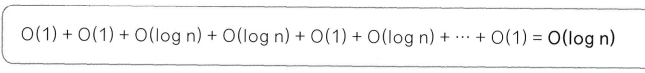

O(1)  < O(n), O(log n)
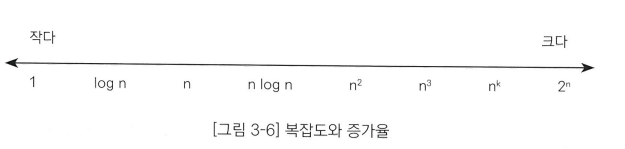

In [9]:
## 이진 검색 알고리즘의 실행 과정을 출력

from typing import Any,Sequence

def bin_search(a:Sequence, key:Any) -> int:
    """시퀀스 a에서 key와 일치하는 원소를 이진 검색(실행과정을 출력)"""
    pl = 0
    pr = len(a) - 1
    
    print('    |', end='')
    for i in range(len(a)):
        print(f'{i : 4}',end='')
    print()
    print('----+' + (4 * len(a) + 2) * '-')
    
    while True:
        pc = (pl + pr) // 2
        
        print('    |',end='')
        if pl != pc:           # pl원소 위에 <-를 출력
            print((pl*4+1)*' ' + '<-' + ((pc - pl) * 4) * ' ' + '+', end='')
        else:
            print((pc*4+1) + ' ' + '<+', end='')
        if pc != pr:           # pr원소 위에 <-를 출력
            print(((pr-pc) * 4 -2) * ' '+ '->')
        else:
            print('->')
        print(f'{pc:3}|',end='')
        for i in range(len(a)):
            print(f"{a[i]:4}", end='')
        print('\n   |')
        if a[pc] == key:
            return pc
        elif a[pc] < key:
            pl = pc + 1
        elif a[pc] > key:
            pr = pc - 1
        if pl > pr:
            break
            return -1 # 검색 실패
    
if __name__ =='__main__':
    num = int(input('원소 수를 입력하세요. : '))
    x = [None] * num
    
    print('배열 데이터를 오름차순으로 입력하세요. : ')
    
    x[0] = int(input(f'x[0]: '))
    
    for i in range(1,num):
        while True:
            x[i] = int(input(f'x[{i}]: '))
            if x[i] >= x[i-1]:
                break
    ky = int(input('검색할 값을 입력하세요. : '))
    
    idx = bin_search(x, ky)
    
    if idx == -1:
        print('존재 x')
    else:
        print(f'검색값은 x[{idx}]에 있습니다.')

원소 수를 입력하세요. : 11
배열 데이터를 오름차순으로 입력하세요. : 
x[0]: 1
x[1]: 2
x[2]: 3
x[3]: 4
x[4]: 5
x[5]: 6
x[6]: 7
x[7]: 8
x[8]: 9
x[9]: 0
x[9]: 11
x[10]: 11
검색할 값을 입력하세요. : 8
    |   0   1   2   3   4   5   6   7   8   9  10
----+----------------------------------------------
    | <-                    +                  ->
  5|   1   2   3   4   5   6   7   8   9  11  11
   |
    |                         <-        +      ->
  8|   1   2   3   4   5   6   7   8   9  11  11
   |
    |

TypeError: unsupported operand type(s) for +: 'int' and 'str'

# 해시법
### : "데이터를 저장할 위치 = 인덱스"를 간단한 연산으로 구하는 것을 의미
### : 검색 + 데이터의 추가/삭제 할 수 있다.
#### 정렬된 배열에서 원소 추가하기
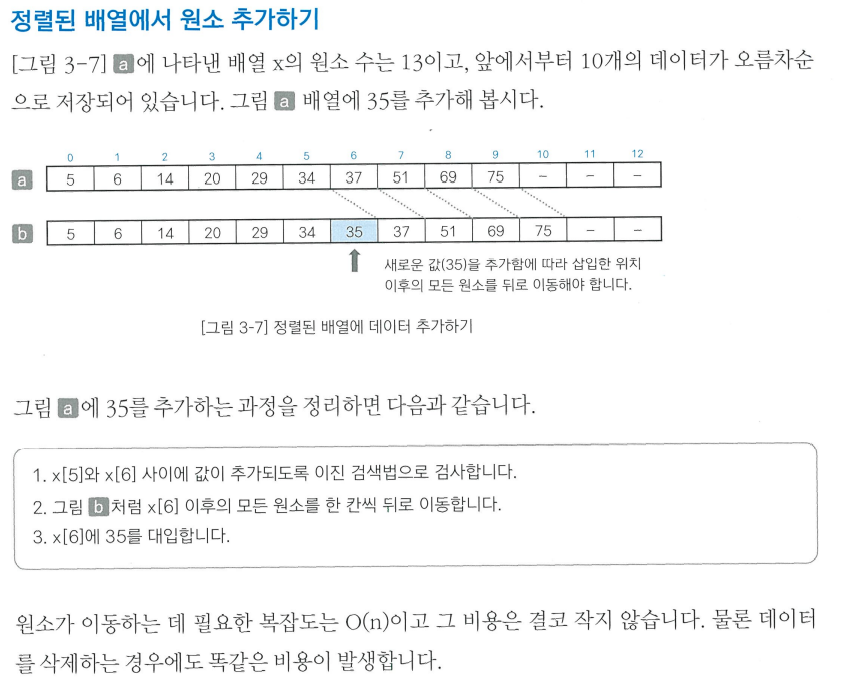

#### 해시법
- 아래 그림은 위 그림의 a에 나타낸 배열의 키(원소의 값)를 원소 개수인 13으로 나눈 나머지를 정리한것
- 이 나머지를 해시값이라고 한다. 해시값은 데이터에 접근할 때 기준이 된다.
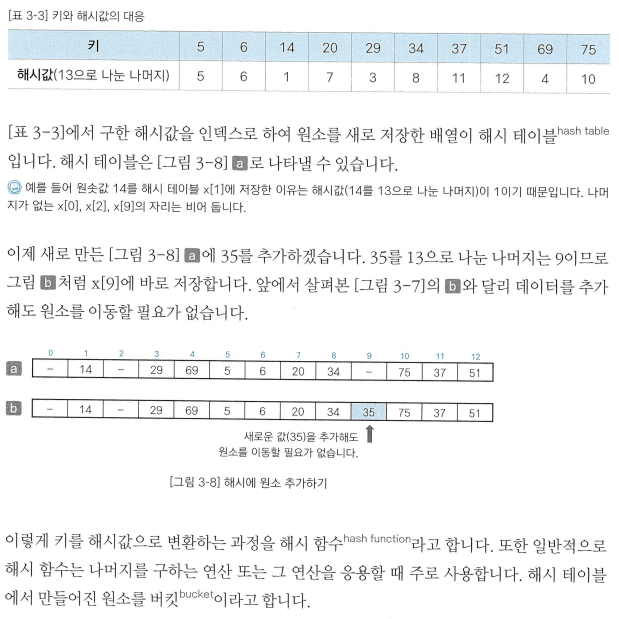

#### 해시 충돌
- 저장할 버킷이 중복되는 현상 : 충돌
##### 충돌 발생했을 떄 : 체인법, 오픈 주소법으로 대처 가능
- 체인법: 해시값이 같은 원소를 체인 모양의 연결 리스트로 연결하는 방법
- 오픈 주소법: 빈 버킷을 찾을 때까지 해시를 반복

